In [1]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import numpy as np

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import seaborn as sns
import pylab
import math
import datetime as dt
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [3]:
d={}
for i in range(0,264,1):
    if i<130:
        d[i]=0.04+(i)/264*0.08
    else:
        d[i]=0.08-(i-130)/264*0.08
        

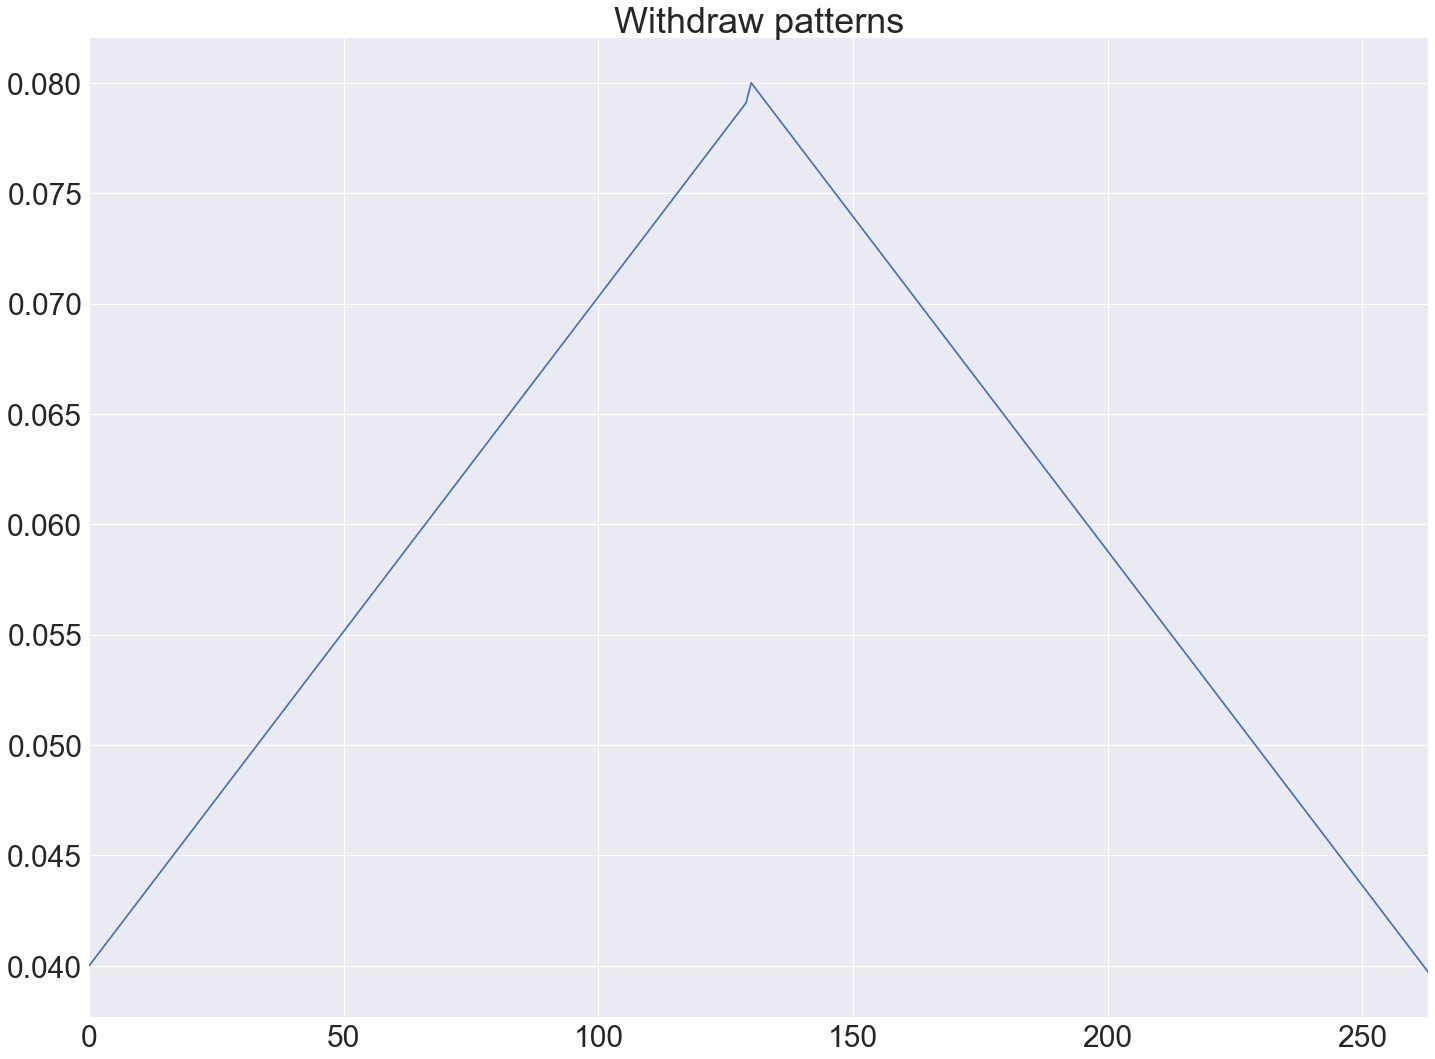

In [4]:
withdraw=pd.Series(d)
withdraw.plot(title="Withdraw patterns")

In [5]:
mu=0.05
std=0.08
contribution=0.01

In [6]:
draws=250
perf_diffs={}
below_water={'Raw':0,
             'Withdraw':0}
for i in range(0,draws):
    x=pd.Series(np.random.normal(mu/12.,std/math.sqrt(12),withdraw.count()))
    y=x-withdraw/12+contribution/12
    a=(pd.DataFrame([x,y]).T+1).cumprod()
    if a.iloc[-1][0]<1:
        below_water['Raw']=below_water['Raw']+1
    if a.iloc[-1][1]<1:
        below_water['Withdraw']=below_water['Withdraw']+1
    perf_diffs[i]=a.iloc[-1].diff()[1]

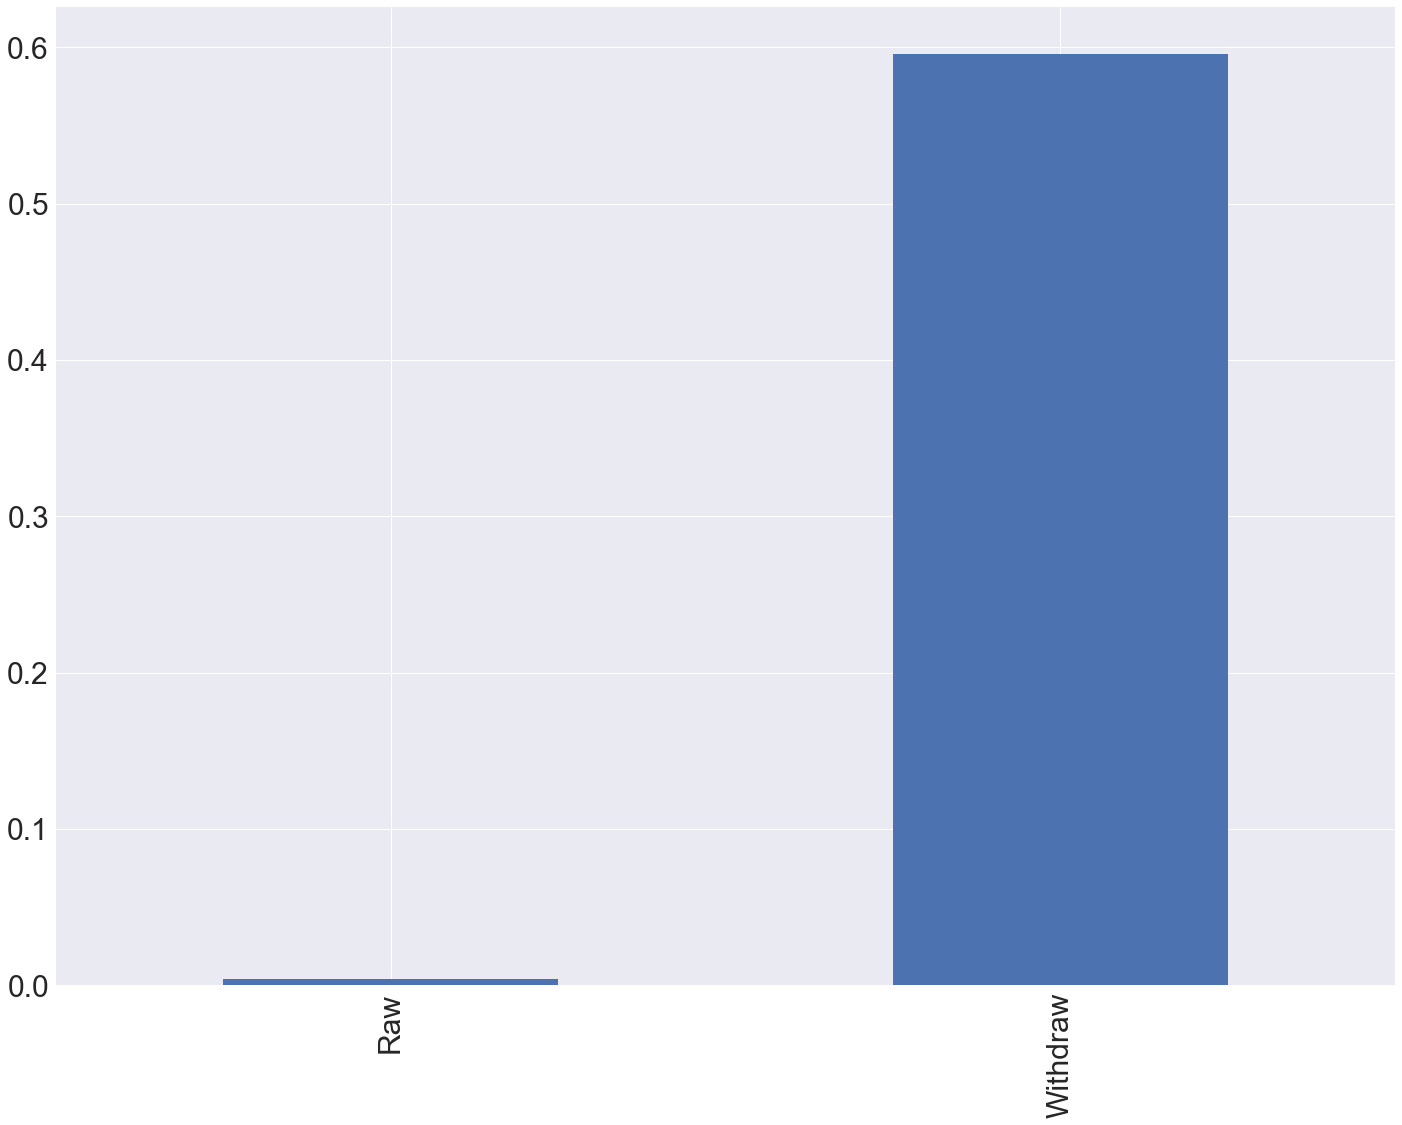

In [7]:
(pd.Series(below_water)/draws).plot(kind='bar')

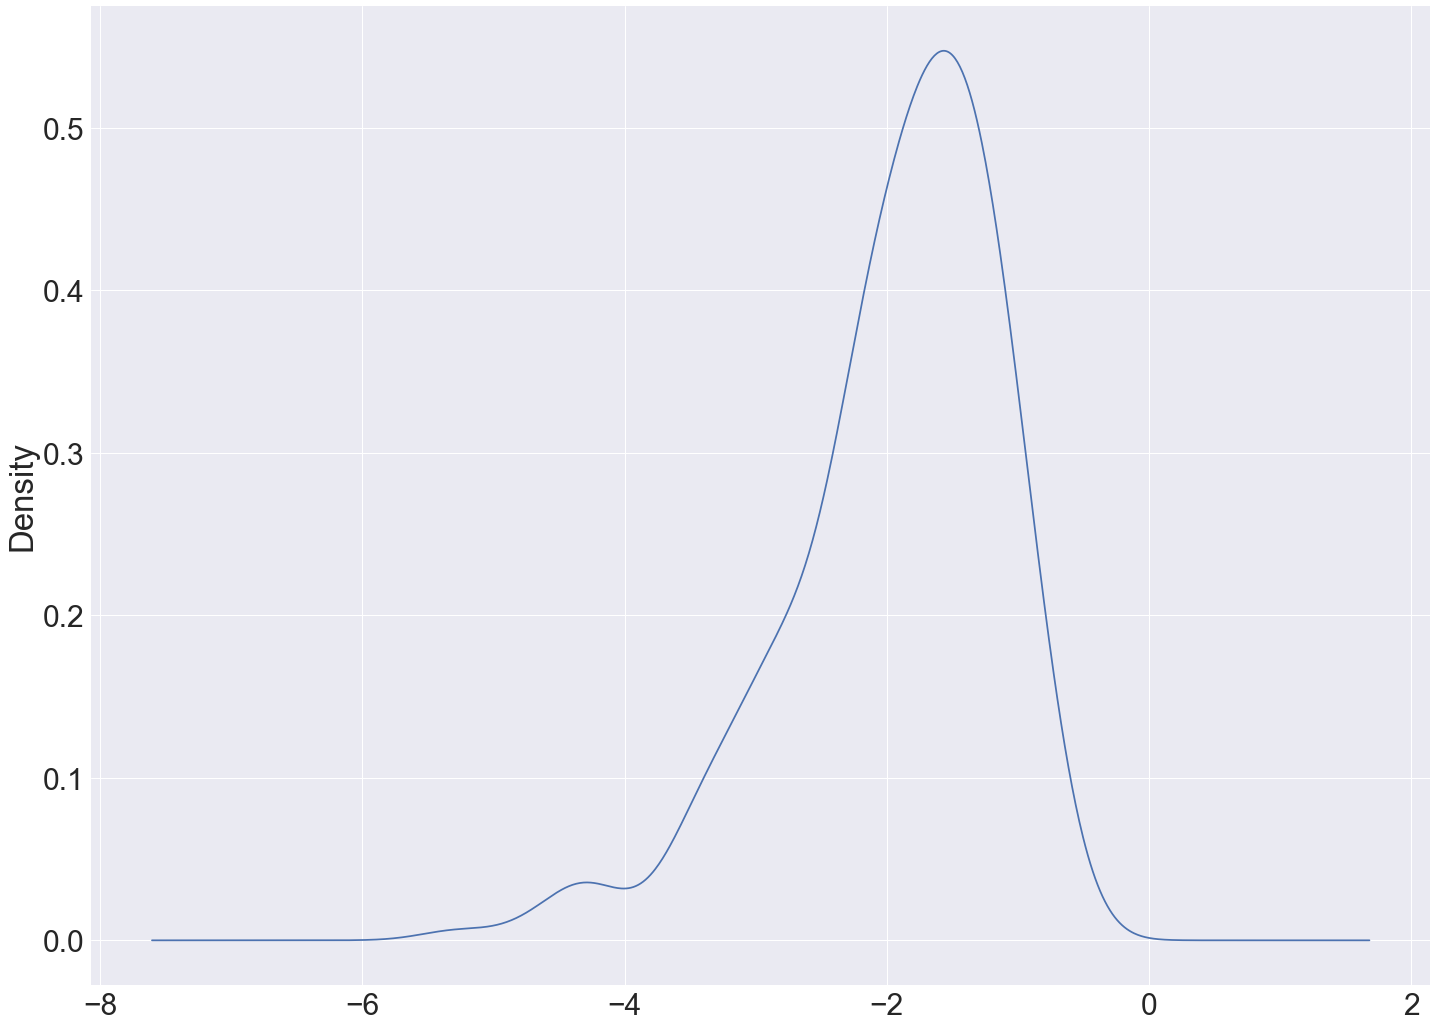

In [8]:
pd.Series(perf_diffs).plot(kind='kde')

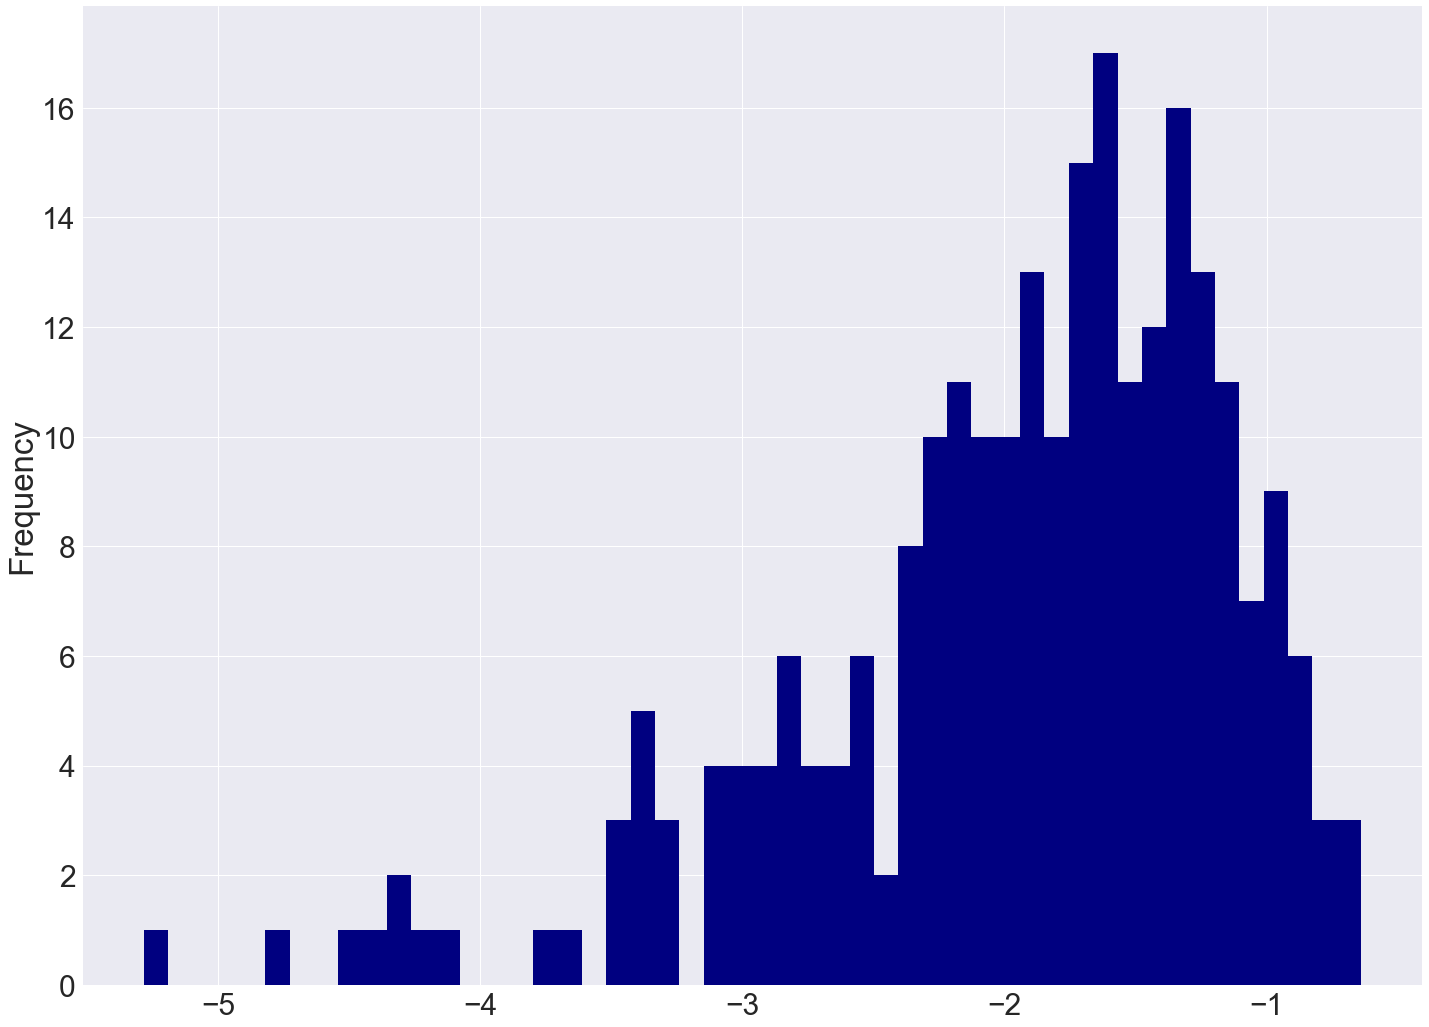

In [9]:
pd.Series(perf_diffs).plot(kind='hist',bins=50,colormap='jet')

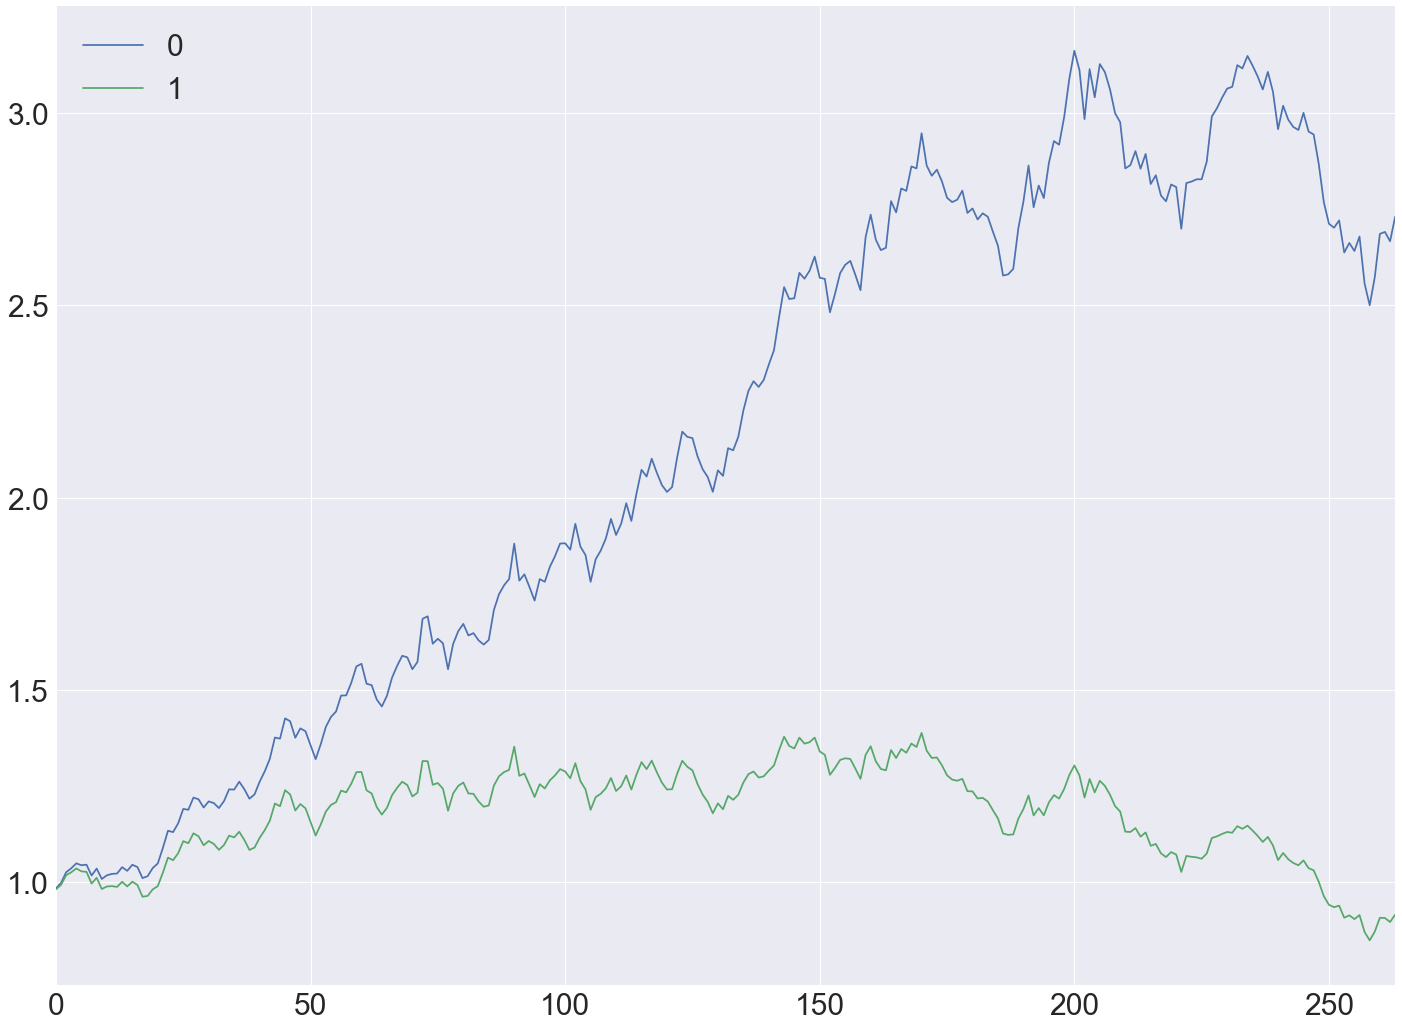

In [10]:
a.plot(logy=False)